<a href="https://colab.research.google.com/github/RoyPuja23/ATMS-597-SP-2020-Project-2-Group-D/blob/master/Project3_GroupD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%pylab inline
import xarray as xr

!pip install netcdf4
!pip install pydap



Populating the interactive namespace from numpy and matplotlib
     |████████████████████████████████| 4.1MB 2.9MB/s 
     |████████████████████████████████| 317kB 53.9MB/s 
     |████████████████████████████████| 2.3MB 2.7MB/s 
     |████████████████████████████████| 122kB 21.0MB/s 


In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
# To download the full data structure into the shared folder "/ATMS_597_Project_3_Group_D/Data/"


#### No need to do it again everytime you run this notebook!!!######


!pip install wget
import wget

#!wget --recursive --no-parent -P '/content/gdrive/My Drive/ATMS_597_Project_3_Group_D/Data/' https://www.ncei.noaa.gov/data/global-precipitation-climatology-project-gpcp-daily/access/

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Next we need to load the data files into a master dataset using Xarray.**

In [0]:
import xarray as xr
data_path = '/content/gdrive/My Drive/ATMS_597_Project_3_Group_D/Data/www.ncei.noaa.gov/data/global-precipitation-climatology-project-gpcp-daily/access/1996/*.nc'
DS_1996 = xr.open_mfdataset(data_path)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [30]:
DS_1996

<xarray.Dataset>
Dimensions:      (latitude: 180, longitude: 360, nv: 2, time: 92)
Coordinates:
  * longitude    (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * latitude     (latitude) float32 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0
  * time         (time) object 1996-10-01 00:00:00 ... 1996-12-31 00:00:00
Dimensions without coordinates: nv
Data variables:
    lat_bounds   (time, latitude, nv) float32 dask.array<chunksize=(1, 180, 2), meta=np.ndarray>
    lon_bounds   (time, longitude, nv) float32 dask.array<chunksize=(1, 360, 2), meta=np.ndarray>
    time_bounds  (time, nv) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    precip       (time, latitude, longitude) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
Attributes:
    Conventions:                CF-1.6, ACDD 1.3
    title:                      Global Precipitation Climatatology Project (G...
    source:                     /data1/GPCP_CDR/GPCP_Output/1DD//bin/199610/s...
    references:                 Huffman et al. 1997, http://dx.doi.org/10.117...
    history:                    1) 2017-05-30T16:52:42Z, Dr. Jian-Jian Wang, ...
    Metadata_Conventions:       CF-1.6, Unidata Dataset Discovery v1.0, NOAA ...
    standard_name_vocabulary:   CF Standard Name Table (v41, 22 February 2017)
    id:                         199610/gpcp_v01r03_daily_d19961001_c20170530.nc
    naming_authority:           gov.noaa.ncdc
    date_created:               2017-05-30T16:52:42Z
    license:                    No constraints on data access or use.
    summary:                    Global Precipitation Climatology Project (GPC...
    keywords:                   EARTH SCIENCE > ATMOSPHERE > PRECIPITATION > ...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Ea...
    cdm_data_type:              Grid
    project:                    GPCP > Global Precipitation Climatology Project
    processing_level:           NASA Level 3
    creator_name:               Dr. Jian-Jian Wang
    creator_email:              jjwang@umd.edu
    institution:                ACADEMIC > UMD/ESSIC > Earth System Science I...
    publisher_name:             NOAA National Centers for Environmental Infor...
    publisher_email:            jjwang@umd.edu
    publisher_url:              https://www.ncei.noaa.gov
    geospatial_lat_min:         -90.0
    geospatial_lat_max:         90.0
    geospatial_lat_units:       degrees_north
    geospatial_lat_resolution:  1 degree
    geospatial_lon_min:         0.0
    geospatial_lon_max:         360.0
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  1 degree
    time_coverage_start:        1996-10-01T00:00:00Z
    time_coverage_end:          1996-10-01T23:59:59Z
    time_coverage_duration:     P1D
    contributor_name:           Robert Adler, Jian-Jian Wang
    contributor_role:           principalInvestigator, processor and custodian
    acknowledgment:             This project was supported in part by a grant...
    cdr_program:                NOAA Climate Data Record Program for satellit...
    cdr_variable:               precipitation
    metadata_link:              gov.noaa.ncdc:XXXXX
    product_version:            v01r03
    platform:                   GOES (Geostationary Operational Environmental...
    sensor:                     Imager, TOVS > TIROS Operational Vertical Sou...
    spatial_resolution:         1 degree
    comment:                    Processing computer: eagle2.umd.edu

In [0]:
ncvar = DS_1996['precip']
#ncvar.mean(axis=0)
ncvar

<xarray.DataArray 'precip' (time: 92, latitude: 180, longitude: 360)>
dask.array<concatenate, shape=(92, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * latitude   (latitude) float32 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0
  * time       (time) object 1996-10-01 00:00:00 ... 1996-12-31 00:00:00
Attributes:
    long_name:      NOAA Climate Data Record (CDR) of Daily GPCP Satellite-Ga...
    standard_name:  lwe_precipitation_rate
    units:          mm/day
    valid_range:    [  0. 100.]
    cell_methods:   area: mean time: mean

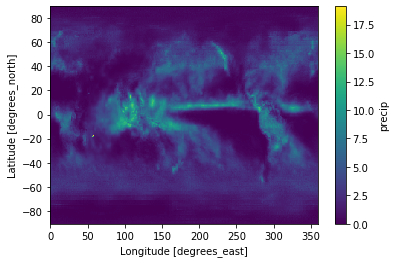

In [0]:
precip_tavg = ncvar.mean(dim='time')
precip_tavg
precip_tavg.plot()

In [0]:
# Plot time series : Code broken, will fix! Need to insert proper datetime convention

import datetime
plt.figure()
plt.plot(ncvar.datetime.month,np.mean(ncvar,axis=(1,2)))
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
#plt.title("It's getting hot up in here!")
plt.show()

AttributeError: ignored

<Figure size 432x288 with 0 Axes>

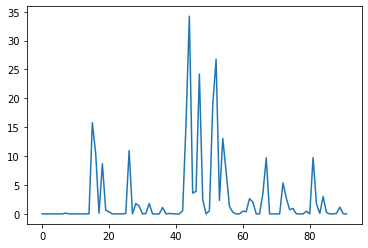

In [36]:


nc_Hilo = DS_1996.sel(longitude=-155+360,latitude=19, method='nearest') # Lat Long of Hilo
plt.plot(nc_Hilo['precip'].values)
# Hilo_precip_tavg = .mean(dim='time')
# Hilo_precip_tavg
# Hilo_precip_tavg.plot()